In [7]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
class MyModel(Prophet):
    def __init__(self,model, df, target:str, train_size:float=0.8, future:int=0):
        self.model = model
        self.periods = future
        #Mise en forme de la data
        self.data = df[[target]].copy()
        self.data.rename(columns={target:'y'}, inplace=True)
        self.data.index.name = 'ds'
        self.data.reset_index(inplace=True)
        
        #Séparation train/test
        
        self.ratio = int(len(df) * train_size)
        
        self.train = self.data.iloc[:self.ratio,:]
        self.test = self.data.iloc[self.ratio:,:]

    
    def fit(self):
        self.model.fit(self.train)

    def predict(self) :
        
        self.future = self.model.make_future_dataframe(periods=self.periods+len(self.test))
        
        self.forecast = self.model.predict(self.future)
    
    def fit_predict(self):
        self.fit()
        self.predict()
          
    def plot(self, figsize=(15,8)):
        plt.figure(figsize=figsize)
        
        plt.plot(self.data.set_index('ds'), label='True Values')
        plt.plot(self.forecast.set_index('ds')['yhat'], label='Predicted Values')
        
        plt.axvline(x=self.data.set_index('ds').index[self.ratio], color='red' )
        plt.legend()
        plt.show()     
        
    def save_csv(self, path=''):
        self.csv = self.forecast.merge(self.data, how='left', on='ds')
        self.csv.to_csv(path, index=False)
        
        

In [26]:
train = pd.read_csv('data/ml/train.csv', index_col='Date', parse_dates=['Date'])
test = pd.read_csv('data/ml/test.csv', index_col='Date', parse_dates=['Date'])

In [27]:
px.line(train.diff(),y=train.columns)

20:19:21 - cmdstanpy - INFO - Chain [1] start processing
20:19:21 - cmdstanpy - INFO - Chain [1] done processing


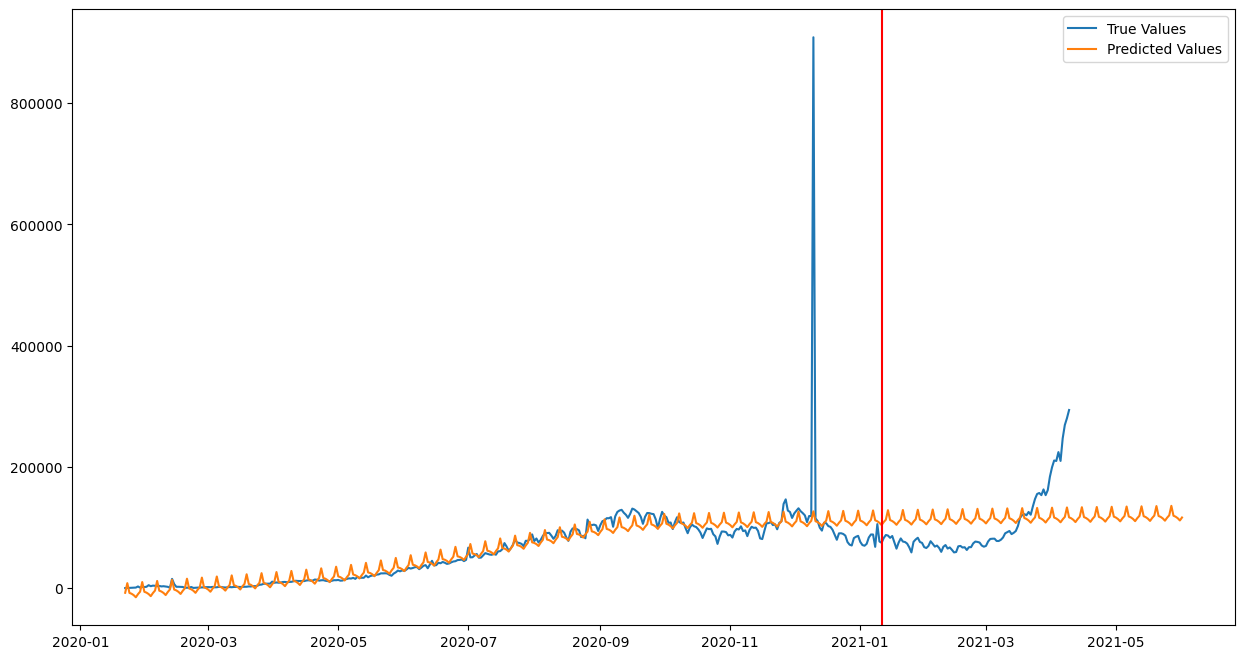

In [40]:
Params = {
    'growth':'linear',
    'changepoints':None,
    'n_changepoints':25,
    'changepoint_range':0.8,
    'yearly_seasonality':'auto',
    'weekly_seasonality':'auto',
    'daily_seasonality':'auto',
    'holidays':None,
    'seasonality_mode':'additive',
    'seasonality_prior_scale':10.0,
    'holidays_prior_scale':10.0,
    'changepoint_prior_scale':0.05,
    'mcmc_samples':0,
    'interval_width':0.80,
    'uncertainty_samples':100,
    'stan_backend':None,
    'scaling':'absmax',
    'holidays_mode':None
    
}
Asia = MyModel(
    model = Prophet(**Params),
    df = train.diff().map(lambda x : max(0,x)),
    target='Asia',
    future=53
)
Asia.fit_predict()
Asia.plot()
Asia.save_csv("data/prophet/Asia.csv")